In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from ipywidgets import widgets,interact,interactive

In [2]:
df = pd.read_csv('shooting.csv',index_col='Rk')

In [3]:
df.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
Rk,,,,,,,,,,,,,,,,,,,,,
1,Ismael Aaneba,FRA,"FW,DF",Strasbourg,Ligue 1,21,1999,0.1,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
2,Patrick van Aanholt,NED,DF,Crystal Palace,Premier League,29,1990,19.7,0,18,...,20.3,3,0,0,1.2,1.2,0.07,-1.2,-1.2,Matches
3,Issah Abbas,GHA,"DF,FW",Mainz 05,Bundesliga,21,1998,0.2,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,32,1987,32.1,3,15,...,10.2,0,0,0,1.7,1.7,0.11,1.3,1.3,Matches
5,Sabit Abdulai,GHA,MF,Getafe,La Liga,21,1999,0.7,0,0,...,0.0,0,0,0,0.0,0.0,0.00,0.0,0.0,Matches


In [4]:
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 20
mpl.rcParams['legend.fontsize'] = 17

In [5]:
columns = df.columns.to_list()

In [6]:
columns

['Player',
 'Nation',
 'Pos',
 'Squad',
 'Comp',
 'Age',
 'Born',
 '90s',
 'Gls',
 'Sh',
 'SoT',
 'SoT%',
 'Sh/90',
 'SoT/90',
 'G/Sh',
 'G/SoT',
 'Dist',
 'FK',
 'PK',
 'PKatt',
 'xG',
 'npxG',
 'npxG/Sh',
 'G-xG',
 'np:G-xG',
 'Matches']

In [7]:
columns = columns[8:-1]

# WIDGETS

In [8]:
# WIDGET FOR SELECTING X AXES PARAMETER

x_val = widgets.Dropdown(
    options=columns,
    value=None,
    description='X Axis:',
)
display(x_val)

Dropdown(description='X Axis:', options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist…

In [9]:
x_val.value

In [10]:
# WIDGET FOR SELECTING X AXES PARAMETER

y_val = widgets.Dropdown(
    options=columns,
    value=None,
    description='Y Axis:',
)
display(y_val)

Dropdown(description='Y Axis:', options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist…

In [11]:
y_val.value

In [12]:
# WIDGET FOR CONVERTING TO PER 90

per90 = widgets.Checkbox(
    value=False,
    description='Per 90',
    disabled=False,
    indent=False,
)
display(per90)

Checkbox(value=False, description='Per 90', indent=False)

In [13]:
per90.value

False

In [14]:
# WIDGETS FOR MINIMUM 90s

games = widgets.FloatSlider(min = 0, max = 38, step = 0.1,
                            description = 'Minm 90s:')
display(games)

FloatSlider(value=0.0, description='Minm 90s:', max=38.0)

In [15]:
games.value

0.0

In [16]:
# WIDGET FOR PARTICULAR CLUB

clubs = df['Squad'].unique().tolist()
club = widgets.Combobox(
    options=clubs,
    value = None,
    description='Club:',
    placeholder='Choose A Club'
)
display(club)

Combobox(value='', description='Club:', options=('Strasbourg', 'Crystal Palace', 'Mainz 05', 'Reims', 'Getafe'…

In [17]:
club.value

''

In [18]:
# WIDGET FOR PLAYER

if len(club.value)==0:
    players = df['Player'].unique().tolist()
else:
    players = df[df['Squad']==club.value]['Player'].unique().tolist()

player = widgets.Combobox(
    placeholder='Choose a Footballer',
    options=players,
    description='Player:',
    ensure_option=True,
    disabled=False
)
display(player)

Combobox(value='', description='Player:', ensure_option=True, options=('Ismael Aaneba', 'Patrick van Aanholt',…

In [19]:
player.value

''

In [20]:
# WIDGET FOR POSITION FILTERING
# You need to press shift while selecting multiple columns

pos = df['Pos'].unique().tolist()

positions = widgets.SelectMultiple(
    options=pos,
    value=['FW'],
    #rows=10,
    description='Positions:',
    disabled=False
)
display(positions)

SelectMultiple(description='Positions:', index=(5,), options=('FW,DF', 'DF', 'DF,FW', 'MF', 'FW,MF', 'FW', 'MF…

In [21]:
positions.value

('FW',)

In [22]:
#Choose background color

bgcolor = widgets.ColorPicker(
    concise=False,
    description='Background:',
    value='white',
    disabled=False
)
display(bgcolor)

ColorPicker(value='white', description='Background:')

In [23]:
bgcolor.value

'white'

In [24]:
#choose remaining point color

lab_col = widgets.ColorPicker(
    concise=False,
    description='Label color:',
    value='black',
    disabled=False
)
display(lab_col)

ColorPicker(value='black', description='Label color:')

In [25]:
lab_col.value

'black'

In [26]:
#choose main point color for player

point_col = widgets.ColorPicker(
    concise=False,
    description='Point color:',
    value='blue',
    disabled=False
)
display(point_col)

ColorPicker(value='blue', description='Point color:')

In [27]:
point_col.value

'blue'

In [28]:
#choose main point color for player

text_col = widgets.ColorPicker(
    concise=False,
    description='Font Color:',
    value='black',
    disabled=False
)
display(text_col)

ColorPicker(value='black', description='Font Color:')

In [29]:
text_col.value

'black'

In [30]:
# CHOOSING TITLE OF PLOT

title = widgets.Text(
    placeholder='Type something',
    description='Plot Title:',
    disabled=False
)
display(title)

Text(value='', description='Plot Title:', placeholder='Type something')

In [31]:
title.value

''

In [32]:
# CHOOSING X AXIS LABEL

x_lab = widgets.Text(
    placeholder='Type something',
    description='X Label:',
    disabled=False
)
display(x_lab)

Text(value='', description='X Label:', placeholder='Type something')

In [33]:
x_lab.value

''

In [34]:
# CHOOSING Y AXIS LABEL

y_lab = widgets.Text(
    placeholder='Type something',
    description='Y Label:',
    disabled=False
)
display(y_lab)

Text(value='', description='Y Label:', placeholder='Type something')

In [35]:
y_lab.value

''

# CREATING A FUNCTION WHICH PLOTS THIS

In [36]:
def plot_graph(x_val, y_val, per90, min_90s, player, positions, title, x_label, y_label, background_col, 
               point_col, label_col):
    
    fig, ax = plt.subplots(figsize=(10,8))
    fig.set_facecolor(background_col)
    ax.patch.set_facecolor(background_col)
    
    
    ax.set_xlabel(x_label,fontdict = {'weight':'heavy', 'fontsize':20})
    ax.set_ylabel(y_label,fontdict = {'weight':'heavy', 'fontsize':20})
    ax.set_title(title,pad=10,loc='left',fontdict = {'weight':'heavy', 'fontsize':25})
    
    df_fil = df.copy()
    df_fil = df_fil[df_fil['90s']>=min_90s]
    df_fil = df_fil[df_fil['Pos'].apply(lambda x: x in list(positions))]
    
    ax.grid(color='grey', alpha=0.5, ls='dashed',lw=0.5)
    
    if per90:
        df_fil[x_val] = df_fil[x_val]/df_fil['90s']
        df_fil[y_val] = df_fil[y_val]/df_fil['90s']
        
    x,y = df_fil[x_val], df_fil[y_val]
    
    ax.scatter(x,y,c=label_col,alpha=0.5)
    
    df_player = df_fil[df_fil['Player']==player]
    if len(df_player)==0:
        print (player + ' does not have adequate minutes or isn\'t within the specified positions')
        return 0
    
    ax.scatter(df_player[x_val], df_player[y_val], c=point_col)
    x_sh, y_sh = (max(x)-min(x))/20, (max(y)-min(y))/50
    ax.text(df_player[x_val]-x_sh, df_player[y_val] + y_sh , player, size=12)
    
    plt.tight_layout()

# ASSIMILATING ALL WIDGETS TOGETHER

In [37]:
display(x_val)
display(y_val)
display(per90)
display(games)
display(club)
display(player)
display(positions)
display(bgcolor)
display(text_col)
display(lab_col)
display(point_col)
display(title)
display(x_lab)
display(y_lab)

Dropdown(description='X Axis:', options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist…

Dropdown(description='Y Axis:', options=('Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist…

Checkbox(value=False, description='Per 90', indent=False)

FloatSlider(value=0.0, description='Minm 90s:', max=38.0)

Combobox(value='', description='Club:', options=('Strasbourg', 'Crystal Palace', 'Mainz 05', 'Reims', 'Getafe'…

Combobox(value='', description='Player:', ensure_option=True, options=('Ismael Aaneba', 'Patrick van Aanholt',…

SelectMultiple(description='Positions:', index=(5,), options=('FW,DF', 'DF', 'DF,FW', 'MF', 'FW,MF', 'FW', 'MF…

ColorPicker(value='white', description='Background:')

ColorPicker(value='black', description='Font Color:')

ColorPicker(value='black', description='Label color:')

ColorPicker(value='blue', description='Point color:')

Text(value='', description='Plot Title:', placeholder='Type something')

Text(value='', description='X Label:', placeholder='Type something')

Text(value='', description='Y Label:', placeholder='Type something')

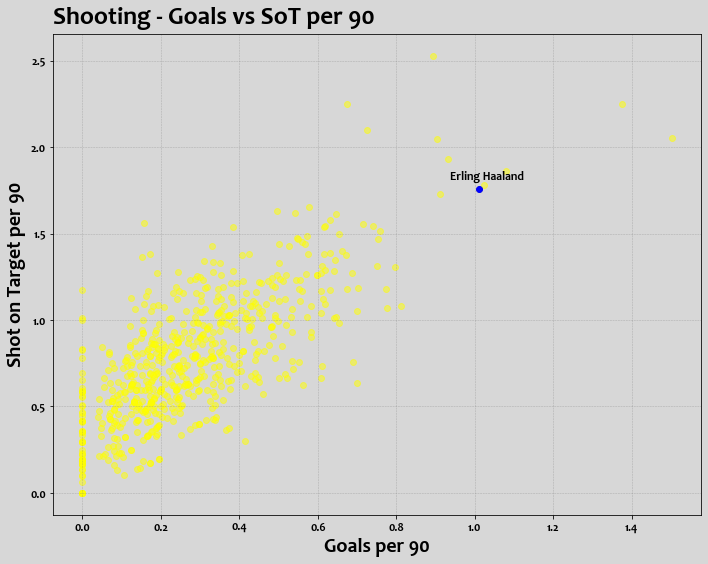

In [38]:
plot_graph(x_val.value,y_val.value,per90.value,games.value,player.value,
               positions.value,title.value,x_lab.value,y_lab.value,bgcolor.value,
               point_col.value,lab_col.value)